In [2]:
### BERT MODEL

### The bert-base model has a vocabulary size of 30522 (vocab_size) → vocab_size. 
### The maximum length of the input sequences 512 tokens → model_max_length.
### Determines which side of the sequence to truncate when it exceeds the model_max_length. Right truncation means that ### tokens will be removed from the end of the sequence, left means tokens will be removed from start.

### token id's generation

In [26]:
from transformers import BertTokenizer
import numpy as np

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

long_sentences = [
    [
        "What is Cybersecurity?",
        "Cybersecurity is the practice of protecting systems, networks, and programs from digital attacks, theft, or damage. These cyberattacks usually aim to access, alter, or destroy sensitive information, extort money, or disrupt normal business operations. Key components include:\n"
        "- Network Security: Protecting network integrity and data.\n"
        "- Application Security: Securing applications by identifying vulnerabilities.\n"
        "- Information Security: Ensuring data privacy and integrity.\n"
        "- Operational Security: Managing data handling and protection practices.\n"
        "Methods such as firewalls, encryption, antivirus software, and multi-factor authentication (MFA) are employed to mitigate cyber threats."
    ],
    [
        "What is Malware?",
        "Malware, short for malicious software, refers to any software designed to cause harm to a computer, network, or server. It is used by attackers to steal data, spy on users, or damage systems. Types of malware include:\n"
        "- Viruses: Infect programs and replicate.\n"
        "- Worms: Spread independently across networks.\n"
        "- Trojan Horses: Disguised as legitimate software but deliver malicious payloads.\n"
        "- Ransomware: Encrypts data and demands payment for decryption.\n"
        "- Spyware: Collects and transmits user data secretly.\n"
        "- Adware: Shows unwanted ads and may track user data.\n"
        "Entry points include infected websites, email attachments, and social engineering."
    ],
    [
    "What is Phishing?",
    "Phishing is a type of cyberattack where attackers impersonate legitimate entities to trick individuals into revealing sensitive information such as usernames, passwords, or financial details. Phishing typically occurs through deceptive emails, websites, or messages that appear to come from trusted sources.\n"
    "Common types of phishing attacks include:\n"
    "- Spear Phishing: Targeted attacks aimed at specific individuals or organizations.\n"
    "- Whaling: Phishing attempts directed at high-profile targets like executives or senior management.\n"
    "- Smishing: Phishing conducted through SMS text messages.\n"
    "- Vishing: Voice-based phishing scams.\n"
    "Phishing is often identified by suspicious links, urgent requests for personal information, and poor grammar in communications. Users can protect themselves by scrutinizing sender details, avoiding clicking on unverified links, and enabling multi-factor authentication."
]
]
ma=86
l=sorted(long_sentences,key=len,reverse=True)
max_length=ma
TOKEN_IDS=[]
i=0
SEGMENT_IDS=[]
for sentence in long_sentences:
    encoded_input = tokenizer(
        sentence[0],sentence[1],
        max_length=max_length,      
        truncation=True,     
        padding="max_length"
    )
    tokens = tokenizer.convert_ids_to_tokens(encoded_input["input_ids"])
    
    print(f"Question: {sentence[0][:]}...")  
#     print(f"Answer:{sentence[1]:[:]}...")
    print(f"Tokens: {tokens}...")       
    print(f"Token IDs: {encoded_input['input_ids']}...")
    print("\n")
#     print("Length of the sentence is",len(sentence[0].split(" ")))
    print("Token shape for sentence is",np.array([tokens]).shape)
#     print("Length of Encoded Input of this sentence is",len(encoded_input['input_ids'][:50]))
    print("\n")
    print("*********************************************************\n")
    TOKEN_IDS.append(np.array(encoded_input['input_ids']))
    SEGMENT_IDS.append(np.array([i for j in range(36)]))
    i+=1

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


Question: What is Cybersecurity?...
Tokens: ['[CLS]', 'what', 'is', 'cyber', '##se', '##cu', '##rity', '?', '[SEP]', 'cyber', '##se', '##cu', '##rity', 'is', 'the', 'practice', 'of', 'protecting', 'systems', ',', 'networks', ',', 'and', 'programs', 'from', 'digital', 'attacks', ',', 'theft', ',', 'or', 'damage', '.', 'these', 'cyber', '##att', '##ack', '##s', 'usually', 'aim', 'to', 'access', ',', 'alter', ',', 'or', 'destroy', 'sensitive', 'information', ',', 'ex', '##tort', 'money', ',', 'or', 'disrupt', 'normal', 'business', 'operations', '.', 'key', 'components', 'include', ':', '-', 'network', 'security', ':', 'protecting', 'network', 'integrity', 'and', 'data', '.', '-', 'application', 'security', ':', 'securing', 'applications', 'by', 'identifying', 'vu', '##ln', '##era', '[SEP]']...
Token IDs: [101, 2054, 2003, 16941, 3366, 10841, 15780, 1029, 102, 16941, 3366, 10841, 15780, 2003, 1996, 3218, 1997, 8650, 3001, 1010, 6125, 1010, 1998, 3454, 2013, 3617, 4491, 1010, 11933, 1010, 2

### Segment Id's

In [27]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# sentences=long_sentences

# max_length = 36 

# encoded_pair_1 = tokenizer(
#     sentences[0], sentences[1],
#     max_length=max_length,
#     padding="max_length",
#     truncation=True,
#     return_tensors="pt"
# )

# encoded_pair_2 = tokenizer(
#     sentences[1], sentences[2],
#     max_length=max_length,
#     padding="max_length",
#     truncation=True,
#     return_tensors="pt"
# )


# print("Pair 1 - Input IDs:", encoded_pair_1["input_ids"])
# print("Tensor shape: ",encoded_pair_1['input_ids'].shape)
# print("Pair 1 - Segment IDs:", encoded_pair_1["token_type_ids"])

# print("\nPair 2 - Input IDs:", encoded_pair_2["input_ids"])
# print("Tensor shape: ",encoded_pair_2['input_ids'].shape)
# print("Pair 2 - Segment IDs:", encoded_pair_2["token_type_ids"])


### Postional Id's

In [28]:
import torch

def generate_positional_ids(sentences, max_length):
    
    positional_ids = torch.arange(max_length).unsqueeze(0).expand(len(sentences), -1)
    
    return positional_ids

# Example usage
max_length=86
  # Specify the maximum length
positional_ids = generate_positional_ids(long_sentences, max_length)

print(" Complete Positional IDs:\n", positional_ids)
print("Shapes are: ")
POSITIONAL_IDS=[]
for tensors in positional_ids:
    print("********************************************")
    print(tensors)
    print(np.array([tensors]).shape)
    print("********************************************")
    POSITIONAL_IDS.append(np.array(tensors))

 Complete Positional IDs:
 tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41

In [29]:
TOKEN_IDS=np.array(TOKEN_IDS)
POSITIONAL_IDS=np.array(POSITIONAL_IDS)

In [30]:
print(TOKEN_IDS.shape)
# print(SEGMENT_IDS.shape)
print(POSITIONAL_IDS.shape)

(3, 86)
(3, 86)


In [31]:
combined_ids=TOKEN_IDS+POSITIONAL_IDS
print(combined_ids.shape)

(3, 86)


In [32]:
combined_ids

array([[  101,  2055,  2005, 16944,  3370, 10846, 15786,  1036,   110,
        16950,  3376, 10852, 15792,  2016,  2010,  3233,  2013,  8667,
         3019,  1029,  6145,  1031,  2020,  3477,  2037,  3642,  4517,
         1037, 11961,  1039,  2060,  4084,  1044,  2155, 16975, 19356,
         8720,  2052,  2826,  6653,  2040,  3270,  1052, 11520,  1054,
         2075,  6079,  7638,  2640,  1059,  4704, 25536,  2821,  1063,
         2084, 23272,  3727,  2506,  3194,  1071,  3205,  6238,  2483,
         1087,  1075,  2962,  3102,  1091,  8718,  2966, 11179,  2069,
         3023,  1085,  1085,  4721,  3112,  1101, 12407,  5176,  2091,
        12232, 24810, 19749,  6990,   187],
       [  101,  2055,  2005, 15454,  8063,  1034,   108, 15458,  8067,
         1019,  2470,  2016, 24403,  4020,  1024,  5233,  2016,  2168,
         4025,  2900,  2020,  3447,  7408,  2023,  1061,  3299,  1036,
         2924,  1038,  2059,  8271,  1043,  2041,  2036,  2143,  2046,
        17893,  2037,  8992,  299

In [33]:
combined_ids

array([[  101,  2055,  2005, 16944,  3370, 10846, 15786,  1036,   110,
        16950,  3376, 10852, 15792,  2016,  2010,  3233,  2013,  8667,
         3019,  1029,  6145,  1031,  2020,  3477,  2037,  3642,  4517,
         1037, 11961,  1039,  2060,  4084,  1044,  2155, 16975, 19356,
         8720,  2052,  2826,  6653,  2040,  3270,  1052, 11520,  1054,
         2075,  6079,  7638,  2640,  1059,  4704, 25536,  2821,  1063,
         2084, 23272,  3727,  2506,  3194,  1071,  3205,  6238,  2483,
         1087,  1075,  2962,  3102,  1091,  8718,  2966, 11179,  2069,
         3023,  1085,  1085,  4721,  3112,  1101, 12407,  5176,  2091,
        12232, 24810, 19749,  6990,   187],
       [  101,  2055,  2005, 15454,  8063,  1034,   108, 15458,  8067,
         1019,  2470,  2016, 24403,  4020,  1024,  5233,  2016,  2168,
         4025,  2900,  2020,  3447,  7408,  2023,  1061,  3299,  1036,
         2924,  1038,  2059,  8271,  1043,  2041,  2036,  2143,  2046,
        17893,  2037,  8992,  299

## EMBEDDINGS

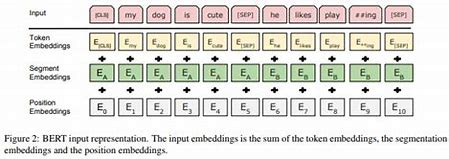

Token embeddings are generated by mapping discrete token IDs from a vocabulary to dense vector representations using an embedding layer, allowing models to work with numerical representations of the tokens.

In [34]:
import torch
import torch.nn as nn


def generate_token_embeddings(token_ids, vocab_size, hidden_size):
   
    embedding_layer = nn.Embedding(vocab_size, hidden_size)

    
    token_tensor = torch.nn.utils.rnn.pad_sequence(
        [torch.tensor(tokens) for tokens in token_ids],
        batch_first=True
    )


    embeddings = embedding_layer(token_tensor)

    return embeddings


vocab_size = 30522
hidden_size = 768

token_embeddings = generate_token_embeddings(TOKEN_IDS, vocab_size, hidden_size)

print("Token Embeddings Shape:", token_embeddings.shape)  

for i in range(len(long_sentences)):
    print("\nToken Embeddings for Sentence:\n",i, token_embeddings[i])
    print("Shape of the tensor: ",token_embeddings[i].shape)
    print("***************************************************************8")
    
print("Final Token Embeddings Shape: \n",token_embeddings.shape)

Token Embeddings Shape: torch.Size([3, 86, 768])

Token Embeddings for Sentence:
 0 tensor([[-0.3862,  0.8642, -0.0488,  ..., -0.6794,  0.2618,  1.6389],
        [-0.4664, -1.3155,  1.6767,  ...,  2.6758,  0.9058, -0.5537],
        [-0.6809,  0.2599,  1.1684,  ..., -0.6493,  2.5284,  0.9133],
        ...,
        [-0.6969,  0.1508,  1.7230,  ..., -1.1613,  1.1818,  0.3194],
        [-0.1261, -1.5120, -0.3148,  ...,  2.1631, -0.1121, -0.4161],
        [ 0.7839,  1.4038, -0.5634,  ..., -0.9454, -1.2755,  1.8640]],
       grad_fn=<SelectBackward0>)
Shape of the tensor:  torch.Size([86, 768])
***************************************************************8

Token Embeddings for Sentence:
 1 tensor([[-0.3862,  0.8642, -0.0488,  ..., -0.6794,  0.2618,  1.6389],
        [-0.4664, -1.3155,  1.6767,  ...,  2.6758,  0.9058, -0.5537],
        [-0.6809,  0.2599,  1.1684,  ..., -0.6493,  2.5284,  0.9133],
        ...,
        [-1.9298, -1.9715,  0.0097,  ..., -1.1668, -0.1471, -0.4609],
        [-0

### Positional Embeddings

Positional embeddings are generated by creating a fixed-size embedding for each position in the input sequence,  to provide information about the relative or absolute position of tokens, allowing the model to capture the order of the tokens in a sequence.

In [35]:
import torch
import torch.nn as nn

def generate_positional_embeddings(batch_size, max_length, hidden_size):
    positional_embeddings = nn.Embedding(max_length, hidden_size)
    positional_ids = torch.arange(max_length)
    embeddings = positional_embeddings(positional_ids)
    positional_embeddings_with_batch = embeddings.unsqueeze(0).expand(batch_size, -1, -1)
    return positional_embeddings_with_batch

batch_size = 3
max_length = 86
hidden_size = 768  

positional_embeddings = generate_positional_embeddings(batch_size, max_length, hidden_size)
for i in range(batch_size):
    print("Positional Embeddings:", positional_embeddings[i])
    print("Shape: ",positional_embeddings[i].shape)
    print("********************************************************************\n")
print("\nFinal Positional Embeddings Shape:\n", positional_embeddings.shape)


Positional Embeddings: tensor([[-1.5874e+00,  2.2437e+00,  9.6919e-01,  ...,  9.2780e-01,
          6.1042e-01, -9.5628e-01],
        [-2.1161e-01,  3.7248e-02,  1.7416e-01,  ..., -1.2033e+00,
          2.5375e-01, -1.5684e+00],
        [-1.8311e-03,  1.0172e+00,  1.2379e+00,  ...,  7.6410e-01,
         -1.0544e+00, -3.1783e-02],
        ...,
        [-2.8942e-01,  4.2812e-01,  3.7082e-02,  ...,  8.0340e-01,
         -5.4609e-01,  5.8625e-01],
        [-7.4440e-01,  4.5932e-01, -2.8914e-01,  ...,  1.4828e-01,
         -3.1599e-01, -4.5123e-01],
        [-3.1164e-01,  5.3895e-01,  1.8928e-01,  ..., -8.2956e-01,
         -6.5169e-01,  1.3164e+00]], grad_fn=<SelectBackward0>)
Shape:  torch.Size([86, 768])
********************************************************************

Positional Embeddings: tensor([[-1.5874e+00,  2.2437e+00,  9.6919e-01,  ...,  9.2780e-01,
          6.1042e-01, -9.5628e-01],
        [-2.1161e-01,  3.7248e-02,  1.7416e-01,  ..., -1.2033e+00,
          2.5375e-01, -1.

### Segment Embeddings

Segment embeddings are generated by using an embedding layer that assigns a unique dense vector to each segment (or sentence) in the input, typically initialized with two embeddings (for segment IDs 0 and 1) to differentiate between segments in tasks like sentence pair classification, allowing the model to distinguish which tokens belong to which segment.

In [36]:
import torch
import torch.nn as nn

def generate_segment_embeddings(segment_ids, hidden_size):
    # Create an embedding layer for two segments (0 and 1)
    segment_embeddings = nn.Embedding(2, hidden_size)
    
    # Get the segment embeddings using the segment IDs
    embeddings = segment_embeddings(segment_ids)
    
    return embeddings

# Example parameters
batch_size = 3
max_length = 86
hidden_size = 768  

# Example segment IDs: a tensor of shape (batch_size, max_length)
# Here, the first half is segment 0 and the second half is segment 1
SEGMENT_IDS = torch.zeros((batch_size, max_length), dtype=torch.long)
SEGMENT_IDS[:, max_length // 2:] = 1

# Generate segment embeddings
segment_embeddings = generate_segment_embeddings(SEGMENT_IDS, hidden_size)
for i in range(batch_size):
    print("Segment Embedding: ",segment_embeddings[i])
    print("Shape: ",segment_embeddings[i].shape)
    print("***************************************************************************")
# Output shape and embeddingsape:", segment_embeddings.shape)  # Should be (batch_size, max_length, hidden_size)
print("\nFinal Segment Embeddings:\n", segment_embeddings.shape)


Segment Embedding:  tensor([[ 0.6940,  0.8967, -0.5143,  ...,  0.8052, -1.7212, -0.7802],
        [ 0.6940,  0.8967, -0.5143,  ...,  0.8052, -1.7212, -0.7802],
        [ 0.6940,  0.8967, -0.5143,  ...,  0.8052, -1.7212, -0.7802],
        ...,
        [-1.2047,  1.7846, -0.7213,  ..., -0.9345,  0.4499,  0.2188],
        [-1.2047,  1.7846, -0.7213,  ..., -0.9345,  0.4499,  0.2188],
        [-1.2047,  1.7846, -0.7213,  ..., -0.9345,  0.4499,  0.2188]],
       grad_fn=<SelectBackward0>)
Shape:  torch.Size([86, 768])
***************************************************************************
Segment Embedding:  tensor([[ 0.6940,  0.8967, -0.5143,  ...,  0.8052, -1.7212, -0.7802],
        [ 0.6940,  0.8967, -0.5143,  ...,  0.8052, -1.7212, -0.7802],
        [ 0.6940,  0.8967, -0.5143,  ...,  0.8052, -1.7212, -0.7802],
        ...,
        [-1.2047,  1.7846, -0.7213,  ..., -0.9345,  0.4499,  0.2188],
        [-1.2047,  1.7846, -0.7213,  ..., -0.9345,  0.4499,  0.2188],
        [-1.2047,  1.78

In [37]:
# import torch
# import torch.nn.functional as F
# import random
# segment_embedding_1 = torch.rand((36, 768))
# segment_embedding_2 = torch.rand((36, 768))

# cosine_similarity = F.cosine_similarity(segment_embedding_1, segment_embedding_2)

# print("Cosine Similarity:", cosine_similarity)


In [38]:
combined_embeddings=token_embeddings+positional_embeddings
combined_embeddings.shape

torch.Size([3, 86, 768])

In [39]:
combined_embeddings

tensor([[[-1.9736,  3.1079,  0.9204,  ...,  0.2484,  0.8722,  0.6827],
         [-0.6780, -1.2783,  1.8509,  ...,  1.4724,  1.1595, -2.1221],
         [-0.6827,  1.2771,  2.4063,  ...,  0.1148,  1.4741,  0.8816],
         ...,
         [-0.9863,  0.5789,  1.7600,  ..., -0.3579,  0.6357,  0.9057],
         [-0.8705, -1.0527, -0.6040,  ...,  2.3114, -0.4281, -0.8673],
         [ 0.4723,  1.9428, -0.3741,  ..., -1.7750, -1.9272,  3.1804]],

        [[-1.9736,  3.1079,  0.9204,  ...,  0.2484,  0.8722,  0.6827],
         [-0.6780, -1.2783,  1.8509,  ...,  1.4724,  1.1595, -2.1221],
         [-0.6827,  1.2771,  2.4063,  ...,  0.1148,  1.4741,  0.8816],
         ...,
         [-2.2192, -1.5434,  0.0468,  ..., -0.3634, -0.6932,  0.1254],
         [-1.5732,  1.9369, -0.3645,  ...,  0.6136, -0.4865,  0.2013],
         [ 0.4723,  1.9428, -0.3741,  ..., -1.7750, -1.9272,  3.1804]],

        [[-1.9736,  3.1079,  0.9204,  ...,  0.2484,  0.8722,  0.6827],
         [-0.6780, -1.2783,  1.8509,  ...,  1

### Attention Mask

In [40]:
import torch

def generate_attention_mask(combined_embeddings):
    batch_size, max_length, _ = combined_embeddings.shape
    
    attention_mask = (combined_embeddings != 0).any(dim=-1).long()
    
    return attention_mask

batch_size = 3
max_length = 86
hidden_size = 768


combined_embeddings = torch.rand((batch_size, max_length, hidden_size))  

attention_mask = generate_attention_mask(combined_embeddings)


print("Attention Mask Shape:", attention_mask.shape)  
print("Attention Mask:\n", attention_mask)


Attention Mask Shape: torch.Size([3, 86])
Attention Mask:
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


### Attention Mechanism

## 1. Input Preparation
### Input Tensor: The input to the multi-head attention layer is a tensor of shape (batch_size, seq_length, hidden_size), where:
### batch_size is the number of input sequences processed simultaneously.
### seq_length is the length of each input sequence (number of tokens).
### hidden_size is the dimensionality of each token's embedding.

## 2. Linear Transformations
### Linear Layers: Three separate linear transformations are applied to the input tensor to produce the queries, keys, and values:
### Queries: Generated by passing the input through a linear layer designed for queries.
### Keys: Generated by passing the input through a linear layer designed for keys.
### Values: Generated by passing the input through a linear layer designed for values.

## 3. Shape of Queries, Keys, and Values
### After the linear transformations, the shapes of the resulting matrices are:
### Queries Matrix: (batch_size, seq_length, hidden_size)
### Keys Matrix: (batch_size, seq_length, hidden_size)
### Values Matrix: (batch_size, seq_length, hidden_size)

## 4. Reshaping for Multi-Head Attention
### Multi-Head Reshaping: Each of the queries, keys, and values matrices is reshaped to allow for multi-head attention:
### The matrices are reshaped to (batch_size, num_heads, seq_length, head_dim), where:
### head_dim = hidden_size / num_heads
### This involves splitting the hidden_size dimension into multiple heads, enabling the model to learn different representations in parallel.

## 5. Output of the Transformation
# # 1. ### Final Output: The resulting queries, keys, and values matrices are used in the attention computation. Each matrix retains the context of the input sequences while allowing the model to focus on different parts of the input through attention scores.

![](https://www.researchgate.net/publication/366985717/figure/fig4/AS:11431281112323043@1673383393149/Scaled-Dot-Product-Attention-mapping-a-query-and-a-set-of-key-value-pairs-to-an-output.png)

In [41]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_size, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads

        assert (
            hidden_size % num_heads == 0
        ), "hidden_size must be divisible by num_heads"

        self.query_linear = nn.Linear(hidden_size, hidden_size)
        self.key_linear = nn.Linear(hidden_size, hidden_size)
        self.value_linear = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        batch_size, seq_length, hidden_size = x.size()

        queries = self.query_linear(x)  
        keys = self.key_linear(x)
        values = self.value_linear(x)

        # Print the query, key, and value matrices
        print("\nQueries Matrix:- ",queries)
        print("Queries Matrix Shape:", queries.shape)
        print("\nKeys Matrix:- ",keys)
        print("Keys Matrix Shape:", keys.shape)
        print("\nValues Matrix:- ",values)
        print("Values Matrix Shape:", values.shape)

        # Reshape for multi-head attention
        queries = queries.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        keys = keys.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        values = values.view(batch_size, seq_length, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_length, head_dim)
        energy = torch.einsum("nhqd,nhkd->nhqk", [queries, keys])  # (batch_size, num_heads, seq_length, seq_length)

        attention_scores = energy / (self.head_dim ** 0.5)
        print("Attention scores shape: ",attention_scores.shape)
        attention = torch.softmax(energy / (self.head_dim ** 0.5), dim=3)  # Scale and softmax
        print("Attention score shape after softmax: ",attention.shape)
        out = torch.einsum("nhql,nhld->nhqd", [attention, values]).reshape(batch_size, seq_length, hidden_size)  # (batch_size, seq_length, hidden_size)
        out = self.fc_out(out)  # Final linear layer

        return out


batch_size = 3
seq_length = 86
hidden_size = 768
num_heads = 12

attention_layer = MultiHeadAttention(hidden_size, num_heads)


combined_embeddings = combined_embeddings


output_embeddings = attention_layer(combined_embeddings)

print("Output Embeddings Shape:", output_embeddings.shape)  




Queries Matrix:-  tensor([[[-0.3336, -0.1104, -0.2010,  ..., -0.2343, -0.0254,  0.1414],
         [ 0.0008, -0.2280, -0.2320,  ..., -0.1128,  0.2139, -0.3328],
         [ 0.3296, -0.2544, -0.5903,  ..., -0.3380, -0.2704, -0.1561],
         ...,
         [-0.0467, -0.4404, -0.0532,  ..., -0.3379,  0.0445,  0.0274],
         [ 0.0643, -0.0893, -0.3703,  ...,  0.0108,  0.1733, -0.3173],
         [ 0.2845, -0.5920, -0.2714,  ..., -0.0694, -0.1482, -0.1905]],

        [[ 0.1591, -0.3033, -0.5335,  ..., -0.2954,  0.1675,  0.1684],
         [ 0.0653, -0.3028, -0.2386,  ..., -0.2216,  0.0151, -0.1350],
         [ 0.1038, -0.1322, -0.3088,  ..., -0.2952,  0.4910, -0.2578],
         ...,
         [-0.0283, -0.5846, -0.3335,  ..., -0.3694,  0.0342, -0.0603],
         [-0.2569, -0.3152, -0.0657,  ..., -0.1171, -0.0591, -0.0359],
         [ 0.2843, -0.1372, -0.1578,  ..., -0.2653,  0.3191,  0.0614]],

        [[ 0.0930, -0.0384, -0.2212,  ..., -0.4458, -0.0365, -0.0128],
         [ 0.0502, -0.0415

In [42]:
output_embeddings

tensor([[[-0.1223, -0.1315, -0.0793,  ..., -0.0535,  0.1185,  0.2093],
         [-0.1218, -0.1318, -0.0797,  ..., -0.0533,  0.1186,  0.2090],
         [-0.1218, -0.1321, -0.0791,  ..., -0.0535,  0.1188,  0.2091],
         ...,
         [-0.2159, -0.4870, -0.3054,  ...,  0.0545, -0.1449,  0.1685],
         [-0.2156, -0.4871, -0.3056,  ...,  0.0541, -0.1447,  0.1683],
         [-0.2159, -0.4875, -0.3049,  ...,  0.0542, -0.1454,  0.1684]],

        [[-0.1150, -0.1093, -0.0672,  ..., -0.0665,  0.1333,  0.2098],
         [-0.1143, -0.1092, -0.0671,  ..., -0.0665,  0.1325,  0.2099],
         [-0.1148, -0.1088, -0.0672,  ..., -0.0661,  0.1329,  0.2096],
         ...,
         [-0.2240, -0.4953, -0.3235,  ...,  0.0474, -0.1286,  0.1675],
         [-0.2239, -0.4954, -0.3228,  ...,  0.0478, -0.1285,  0.1676],
         [-0.2237, -0.4946, -0.3228,  ...,  0.0476, -0.1287,  0.1679]],

        [[-0.1231, -0.1265, -0.0677,  ..., -0.0777,  0.1259,  0.2041],
         [-0.1232, -0.1270, -0.0674,  ..., -0

In [43]:
class QAHead(nn.Module):
    def __init__(self, hidden_size):
        super(QAHead, self).__init__()
        self.start_logits = nn.Linear(hidden_size, 1)
        self.end_logits = nn.Linear(hidden_size, 1)

    def forward(self, embeddings):
        start_logits = self.start_logits(embeddings).squeeze(-1)  
        end_logits = self.end_logits(embeddings).squeeze(-1)      
        return start_logits, end_logits


In [44]:
qa_head = QAHead(hidden_size)
start_logits, end_logits = qa_head(output_embeddings)

print("Start Logits Shape:", start_logits.shape)  
print("End Logits Shape:", end_logits.shape)      


Start Logits Shape: torch.Size([3, 86])
End Logits Shape: torch.Size([3, 86])


In [45]:
start_logits,end_logits

(tensor([[ 5.1903e-03,  4.9413e-03,  5.1574e-03,  5.0190e-03,  4.4882e-03,
           4.7075e-03,  5.0871e-03, -8.9973e-02, -8.3061e-02, -8.3142e-02,
          -8.3145e-02, -8.2976e-02, -8.2826e-02, -8.2902e-02,  2.8370e-02,
           1.6723e-03,  1.6327e-03,  1.5470e-03,  1.7180e-03,  1.5761e-03,
           1.7040e-03,  1.9245e-02, -1.3720e-03, -1.2795e-03, -1.4725e-03,
          -1.3292e-03, -1.2763e-03, -1.7393e-03, -5.4750e-02, -3.9511e-02,
          -3.9536e-02, -3.9793e-02, -3.9796e-02, -3.9803e-02, -3.9516e-02,
          -3.6554e-02, -1.0518e-01, -1.0512e-01, -1.0526e-01, -1.0511e-01,
          -1.0507e-01, -1.0496e-01, -1.0537e-01, -1.2840e-01, -1.2825e-01,
          -1.2857e-01, -1.2813e-01, -1.2821e-01, -1.2795e-01, -1.2806e-01,
          -9.8288e-03, -2.0979e-02, -2.0935e-02, -2.0877e-02, -2.0953e-02,
          -2.0963e-02, -2.1035e-02, -3.6352e-02, -4.8528e-02, -4.8573e-02,
          -4.8654e-02, -4.8765e-02, -4.8649e-02, -4.8733e-02, -3.4243e-02,
          -6.1112e-02, -6

In [46]:
start_positions = torch.argmax(start_logits, dim=-1)
end_positions = torch.argmax(end_logits, dim=-1)
start_positions,end_positions

(tensor([78, 78, 78]), tensor([14, 14, 14]))

In [47]:
idx=0
for l in long_sentences:
    print("Question 1:")
    print(l[0])
    print(l[1][start_positions[idx]:end_positions[idx]])
    idx+=1

Question 1:
What is Cybersecurity?

Question 1:
What is Malware?

Question 1:
What is Phishing?



### QA Answering

In [22]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

context = "Pradyumna Prahas is a Student of KMIT. He is in his BTECH 3rd year."
question = "Who is Prahas?"

encoding = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors='pt')

input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

with torch.no_grad():
    outputs = bert_model(input_ids, attention_mask=attention_mask)

    hidden_states = outputs.last_hidden_state  




In [79]:

output_embeddings = attention_layer(hidden_states)

qa_head = QAHead(hidden_size)
start_logits, end_logits = qa_head(output_embeddings)

print("Start Logits Shape:", start_logits.shape)
print("End Logits Shape:", end_logits.shape)


Queries Matrix:-  tensor([[[-0.2050,  0.2426,  0.1489,  ...,  0.1986,  0.0547,  0.5571],
         [ 0.1915,  0.1627,  0.1617,  ...,  0.2853, -0.1960,  0.8077],
         [ 0.0266,  0.3304,  0.1861,  ...,  0.0677, -0.3432, -0.1715],
         ...,
         [ 0.2746, -0.0355,  0.1327,  ...,  0.0956, -0.2296, -0.2023],
         [ 0.1610, -0.7086, -0.5655,  ...,  0.0833,  0.0047, -0.4073],
         [ 0.1671, -0.8434, -0.4769,  ..., -0.1296,  0.0627, -0.6540]]],
       grad_fn=<ViewBackward0>)
Queries Matrix Shape: torch.Size([1, 32, 768])

Keys Matrix:-  tensor([[[ 0.4387, -0.4229, -0.2472,  ...,  0.3507, -0.2083,  0.0540],
         [-0.0482, -0.2812, -0.4099,  ...,  0.5263,  0.0311, -0.0277],
         [ 0.1887,  0.1369, -0.6056,  ..., -0.2040,  0.1899, -0.0975],
         ...,
         [-0.3792, -0.1769,  0.0531,  ...,  0.1474,  0.6420,  0.1686],
         [-0.2234, -0.0999, -0.0329,  ...,  0.1259,  0.2501,  0.3813],
         [ 0.0383, -0.1314, -0.0809,  ...,  0.0700,  0.3392,  0.2556]]],
  

In [80]:
start_logits, end_logits

(tensor([[-0.0462, -0.0461, -0.0171, -0.0749, -0.0740,  0.0480,  0.1180,  0.1132,
          -0.1754, -0.1738, -0.2079, -0.1763, -0.1764,  0.0099,  0.0083,  0.0099,
           0.0584,  0.0596,  0.0426, -0.0276, -0.0286, -0.0303, -0.0068, -0.0038,
           0.0421,  0.0406,  0.0718,  0.0641,  0.0627,  0.0389,  0.0814,  0.0825]],
        grad_fn=<SqueezeBackward1>),
 tensor([[-0.0919, -0.0918,  0.0096, -0.0128, -0.0132, -0.0555, -0.0773, -0.0774,
          -0.0199, -0.0117, -0.0096, -0.1335, -0.1326, -0.0922, -0.0695, -0.0703,
          -0.0971, -0.0986, -0.0150,  0.0866,  0.0868,  0.0019, -0.0095, -0.0090,
          -0.0465, -0.0435, -0.0376,  0.0556,  0.0515,  0.0448, -0.0194, -0.0193]],
        grad_fn=<SqueezeBackward1>))

In [81]:
# Find the index of the start and end token with the highest logits
start_idx = torch.argmax(start_logits, dim=-1).item()
end_idx = torch.argmax(end_logits, dim=-1).item()
start_idx,end_idx

(6, 20)

In [82]:
# # Find the index of the start and end token with the highest logits
# start_idx = torch.argmax(start_logits, dim=-1).item()
# end_idx = torch.argmax(end_logits, dim=-1).item()

# Ensure start_idx <= end_idx (sometimes due to noise, the start index could be after the end index)
if start_idx > end_idx:
    start_idx, end_idx = end_idx, start_idx

# Decode the answer from the token indices
predicted_answer_tokens = input_ids[0][start_idx:end_idx + 1]
predicted_answer = tokenizer.decode(predicted_answer_tokens, skip_special_tokens=True)

print("Predicted Answer:", predicted_answer)


Predicted Answer: ? pradyumna prahas is a student of kmit


## WORD 2 VEC